In [62]:
#IMPORT PACKAGES
from fbprophet import Prophet
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

The Facebook Prophet Forecasting Model is a time series forecasting model designed to handle the common features of business time series. Importantly, it is also designed to have intuitive parameters that can be adjusted without knowing the details of the underlying model.

In [63]:
#IMPORT DATASET
fd=sns.load_dataset('flights')
fd.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


here we have imported the flight dataset which can be retrieved from seaborn package.

In [64]:
#SUBSET THE DATASET
fd=fd.loc[:,['passengers']]
fd.head()

,passengers
0,112
1,118
2,132
3,129
4,121


here we snowballed the flight dataset to display the top five rows of the passengers column.

In [65]:
#DATA AS A TIMESTAMP IS NEEDED BY THE PACKAGES
months=pd.date_range('19490101',periods=144,freq='M')
months

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

here DATA AS A TIMESTAMP IS NEEDED BY THE PACKAGES.we extracted a dataframe with column as months which will display the 144 months starting from 1 january 1949.

In [66]:
fd['ds']=months
fd.head(5)

,passengers,ds
0,112,1949-01-31
1,118,1949-02-28
2,132,1949-03-31
3,129,1949-04-30
4,121,1949-05-31


here we included the months column in fd dataframe after renaming months column as ds and then snowballed the top five rows of fd dataframe showing passengers and ds columns.

In [67]:
fd.dtypes

passengers             int64
ds            datetime64[ns]
dtype: object

In [68]:
#RENAME THE COLUMNS AS REQUIRED BY THE PACKAGE.FIRST BUILD THE FORECASTING MODEL 
#WITHOUT DOING ANY TRANSFORMATION OF THE VARIABLE AND CHECK ACCURACY OF THE FORECAST
fd=fd.rename(columns={"passengers":"y"})

In [69]:
fd=fd.sort_index(axis=1)

In [70]:
fd.head(5)

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


passengers column renamed as Y and  timestamp column is shown as ds.Also we need to know that in order to Build Models based on facebook prophet time series modelling,we must have 2 columns where one must be the y column and other column must be ds column which is nothing but the timestamp column.



In [71]:
#BUILD TIMESERIES MODEL
my_forecast=Prophet(interval_width=0.95)

The biggest source of uncertainty in the forecast is the potential for future trend changes. The time series show clear trend changes in the history. Prophet is able to detect and fit these, but we should clearly know the trend changes that we should expect moving forward.

It’s impossible to know for sure, so we do the most reasonable thing we can, and we assume that the future will see similar trend changes as the history. 

In particular, we assume that the average frequency and magnitude of trend changes in the future will be the same as that which we observe in the history. We project these trend changes forward and by computing their distribution we obtain uncertainty intervals.

One property of this way of measuring uncertainty is that allowing higher flexibility in the rate, by increasing changepoint_prior_scale, will increase the forecast uncertainty. This is because if we model more rate changes in the history then we will expect more in the future, and makes the uncertainty intervals a useful indicator of overfitting.

The width of the uncertainty intervals (by default 80%) can be set using the parameter interval_width.we have set the uncertainty intervals as 95%.

In [72]:
my_forecast.fit(fd)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
forecast_periods=my_forecast.make_future_dataframe(periods=36,include_history=True,freq='M')
forecast_periods

,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
...,...
175,1963-08-31
176,1963-09-30
177,1963-10-31
178,1963-11-30


here we make future dataframe for the next 36 months and also include history in our forecast_periods.

In [74]:
forecast=my_forecast.predict(forecast_periods)

In [75]:
forecast1=forecast.loc[:,['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast1.head(5)

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-31,85.716572,43.090344,129.955597
1,1949-02-28,78.419128,36.716930,121.667284
2,1949-03-31,112.236183,67.663590,155.384551
3,1949-04-30,109.416890,66.817290,150.130257
4,1949-05-31,112.915180,68.820924,158.547065


In [76]:
forecast1.tail(5)

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-31,650.927974,609.623242,694.132556
176,1963-09-30,603.267357,559.186828,645.686411
177,1963-10-31,567.327380,520.566296,611.608473
178,1963-11-30,535.186651,493.449872,579.953095
179,1963-12-31,565.043300,522.153893,609.203849


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an  
in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals namely yhat_lower and yhat_upper.

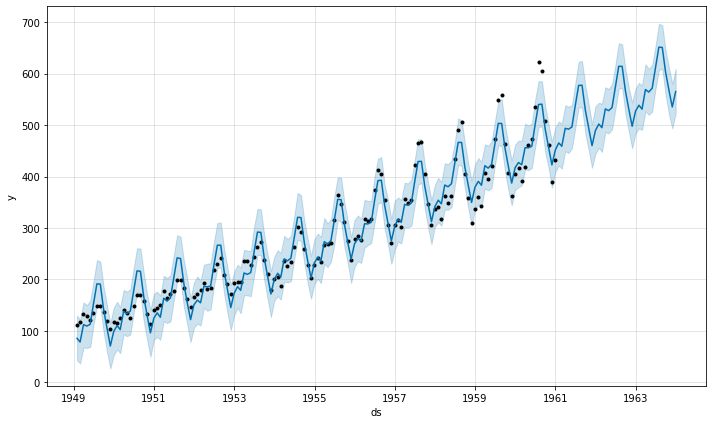

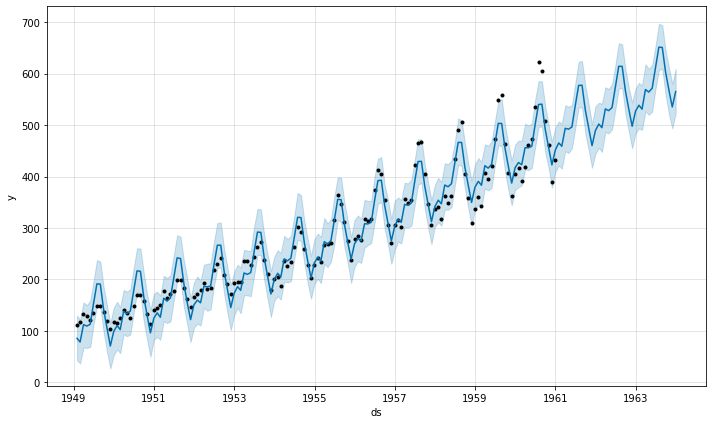

In [77]:
my_forecast.plot(forecast,uncertainty=True)

Forecast plot along with Yhat and y for different time stamps which include original history periods along with forecasting of the next 36 months as well.yhat_lower and yhat_upper determine the uncertainty intervals.

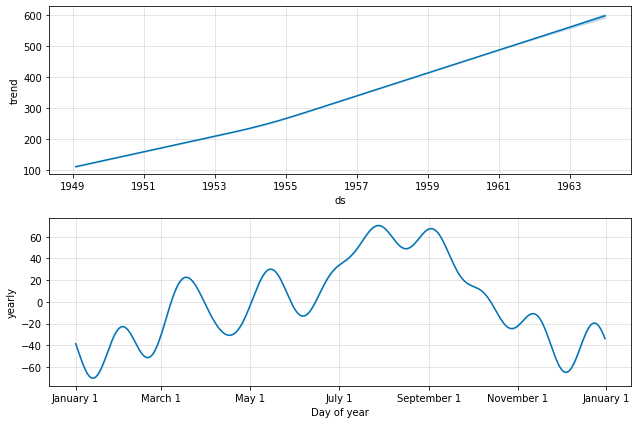

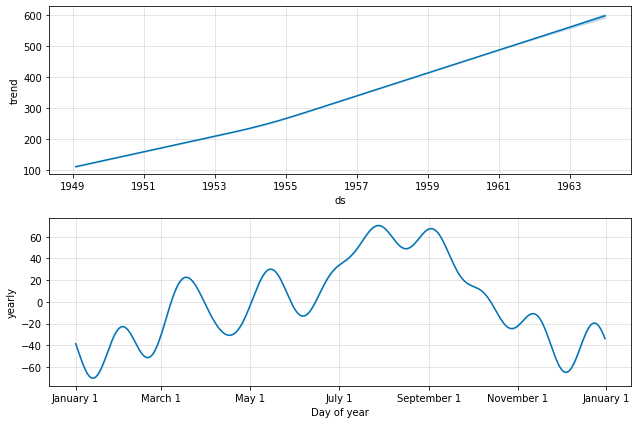

In [78]:
my_forecast.plot_components(forecast)

Facebook prophet follows the approach i.e. General Additive model i.e. Time series which is nothing but trend +seasonality+holiday+error+something extra which we need to Analyze.

A lot of time main inherent and underlying assumption in time series Modelling is that what has happened in past will continue to happen in the future.behaviour seen in the past will continue to demonstrate in future.one example where this assumption inherent in time series modelling is completely get violated in stock market. That is the biggest loophole we have.

A time series could be made up of following main parts 

1. Trend- A systematic pattern of how the time series is behaving over a period of time. For example- GDP of emerging economies such as India is growing over a period of time 

2. Seasonality- Peaks and troughs which happen during the same time. For example- sales of retailers in US goes higher during Thanksgiving and Black Friday 

3. Random noise- As the name suggests, this is the random pattern in a time series 

4. Cyclical- Cycles such as Fuel prices go low during certain time and higher at other times. 

Generally speaking a cycle is long in duration. Please note that not all time series will have all these components. 

A) Additive Seasonal Model- This model is used when the time series shows additive seasonality. For example, an eCommerce company sales in October of each year is $2MM USD higher than the base level sales regardless of what is the base level sales in that particular year. 

In very simplified mathematical equation it can be represented as Observed = Trend + Seasonal + Random 

 B) Multiplicative Seasonal Model- This model is used when the time series shows multiplicative seasonality. For example, for an eCommerce company sales in October of each year is 1.2 times the base level sales in the year. If a particular year has low base level sales, the sales in October will be lower in absolute sense, however it will be 1.2x of the base level sales. 
 
 In very simplified mathematical equation it can be represented as Observed = Trend x Seasonal x Random 
 
 Note: additive time series variance will remain moreover constant over a period of time whereas in Multiplicative time series it is not.

In [79]:
final_df=pd.merge(forecast1,fd,on='ds',how='inner')
final_df.head(5)

,ds,yhat,yhat_lower,yhat_upper,y
0,1949-01-31,85.716572,43.090344,129.955597,112
1,1949-02-28,78.419128,36.716930,121.667284,118
2,1949-03-31,112.236183,67.663590,155.384551,132
3,1949-04-30,109.416890,66.817290,150.130257,129
4,1949-05-31,112.915180,68.820924,158.547065,121


In [80]:
#COMPLETE ACCURACY OF THE FORECAST
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),2)

17.25

Here our mean_absolute_error for the Model built using FBPROPHET is 17.25%.

In [81]:
fd.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [82]:
#LOG TRANSFORMATION
fd.y=np.log(fd.y)
fd.head(5)

,ds,y
0,1949-01-31,4.718499
1,1949-02-28,4.770685
2,1949-03-31,4.882802
3,1949-04-30,4.859812
4,1949-05-31,4.795791


now we take log transformation of Y components and then build models using fbprophet.this will have the impact of reducing outliers so that we arrive at lesser mean absolute error while building our model.

In [83]:
#BUILD TIMESERIES MODEL
my_forecast=Prophet(interval_width=0.95)
my_forecast.fit(fd)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
forecast_periods=my_forecast.make_future_dataframe(periods=36,include_history=True,freq='M')
forecast_periods

,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
...,...
175,1963-08-31
176,1963-09-30
177,1963-10-31
178,1963-11-30


In [85]:
forecast=my_forecast.predict(forecast_periods)
forecast1=forecast.loc[:,['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast1.head(5)

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-31,4.711100,4.646595,4.776610
1,1949-02-28,4.709417,4.633926,4.771299
2,1949-03-31,4.834425,4.767158,4.907525
3,1949-04-30,4.816123,4.750036,4.883514
4,1949-05-31,4.815070,4.751358,4.881962


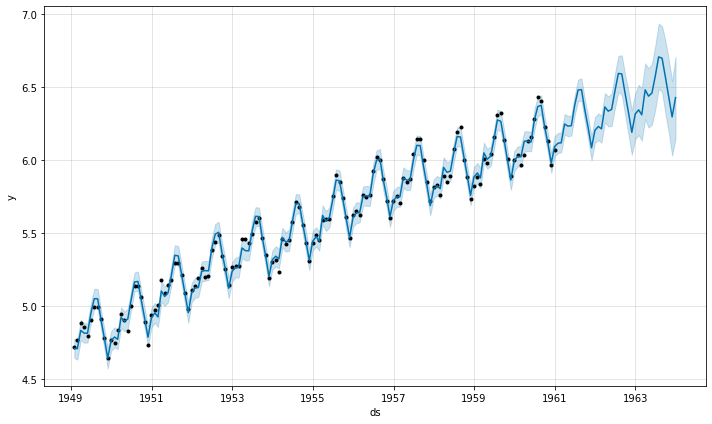

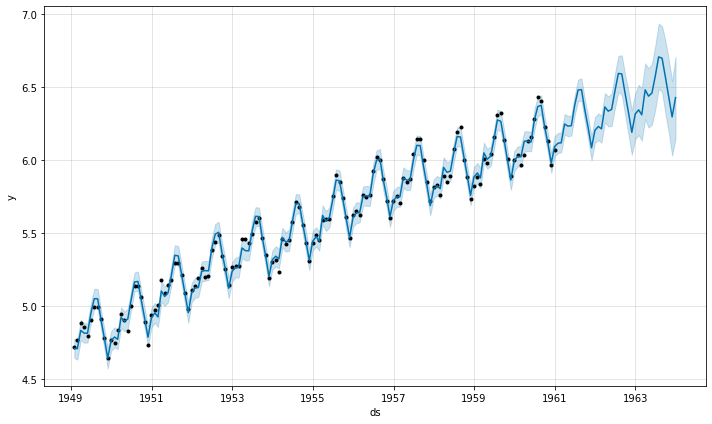

In [86]:
my_forecast.plot(forecast,uncertainty=True)

,ds,yhat,yhat_lower,yhat_upper,y
0,1949-01-31,4.711100,4.646595,4.776610,4.718499
1,1949-02-28,4.709417,4.633926,4.771299,4.770685
2,1949-03-31,4.834425,4.767158,4.907525,4.882802
3,1949-04-30,4.816123,4.750036,4.883514,4.859812
4,1949-05-31,4.815070,4.751358,4.881962,4.795791


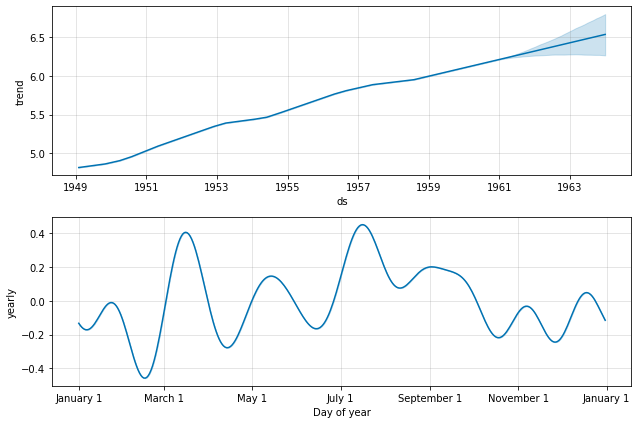

In [87]:
my_forecast.plot_components(forecast)
final_df1=pd.merge(forecast1,fd,on='ds',how='inner')
final_df1.head(5)

In [88]:
#CONVERT 'Y' back to original scale
final_df1.yhat=np.e**(final_df1.yhat)
final_df1.y=np.e**(final_df1.y)
final_df1.head(5)

,ds,yhat,yhat_lower,yhat_upper,y
0,1949-01-31,111.174361,4.646595,4.776610,112.0
1,1949-02-28,110.987424,4.633926,4.771299,118.0
2,1949-03-31,125.766233,4.767158,4.907525,132.0
3,1949-04-30,123.485371,4.750036,4.883514,129.0
4,1949-05-31,123.355412,4.751358,4.881962,121.0


In [89]:
#compute accuracy of the forecast
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df1.yhat,final_df1.y),0)

7.0

we can see the improvement in our mean_absolute_error reduced from 17.25% to 7%.

In [90]:
final_df1.head(5)

,ds,yhat,yhat_lower,yhat_upper,y
0,1949-01-31,111.174361,4.646595,4.776610,112.0
1,1949-02-28,110.987424,4.633926,4.771299,118.0
2,1949-03-31,125.766233,4.767158,4.907525,132.0
3,1949-04-30,123.485371,4.750036,4.883514,129.0
4,1949-05-31,123.355412,4.751358,4.881962,121.0


we can see that converting the variable to log scale make variance more 
stable in the original data and helped significantly in improving the forecast accuracy

In [91]:
final_df1.tail(5)

,ds,yhat,yhat_lower,yhat_upper,y
139,1960-08-31,587.595894,6.310165,6.443936,606.0
140,1960-09-30,509.715470,6.166977,6.298182,508.0
141,1960-10-31,453.090281,6.050288,6.183462,461.0
142,1960-11-30,395.476725,5.913511,6.047313,390.0
143,1960-12-31,442.936633,6.028180,6.165515,432.0


In [95]:
#   GENERATE FORECAST VALUES FOR THE NEXT 36 MONTHS ALONG WITH THE 
# 95% CONFIDENCE INTERVAL
forecast2=forecast.loc[144:,['ds','yhat','yhat_lower','yhat_upper']]
forecast2.yhat=np.e**(forecast2.yhat)
forecast2.yhat_lower=np.e**(forecast2.yhat_lower)
forecast2.yhat_upper=np.e**(forecast2.yhat_upper)
np.round(forecast2,0)

,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,454.0,424.0,487.0
145,1961-02-28,454.0,426.0,487.0
146,1961-03-31,517.0,481.0,553.0
147,1961-04-30,509.0,475.0,547.0
148,1961-05-31,511.0,477.0,548.0
149,1961-06-30,586.0,548.0,627.0
150,1961-07-31,653.0,605.0,701.0
151,1961-08-31,654.0,606.0,706.0
152,1961-09-30,570.0,527.0,612.0
153,1961-10-31,503.0,466.0,543.0


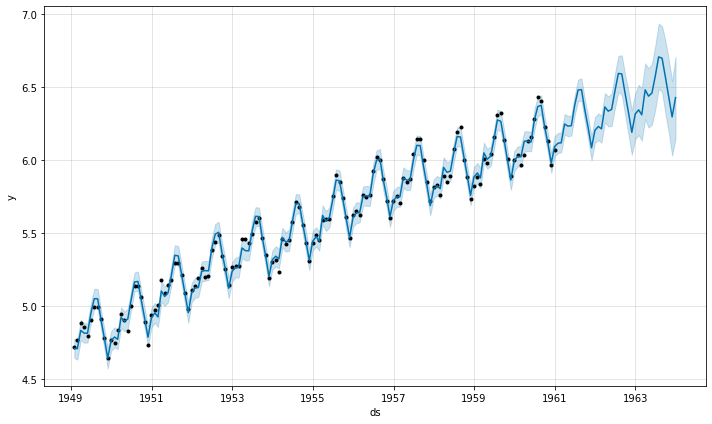

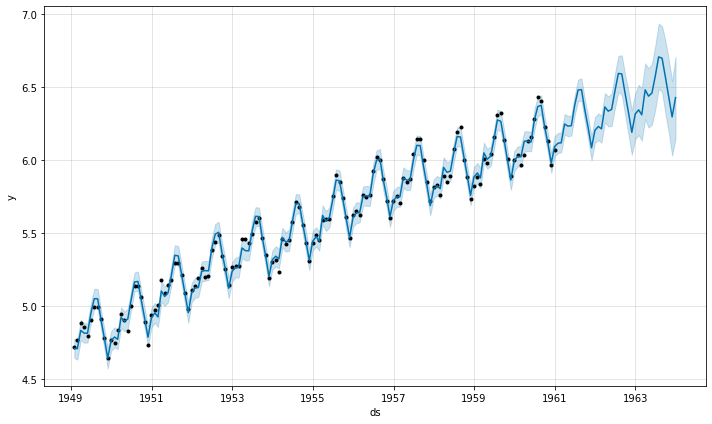

In [96]:
my_forecast.plot(forecast,uncertainty=True)

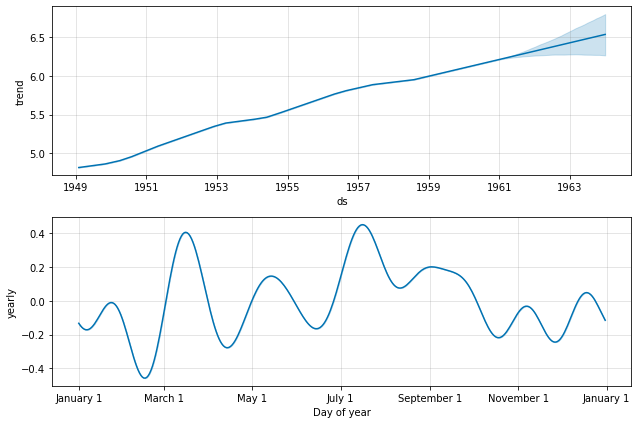

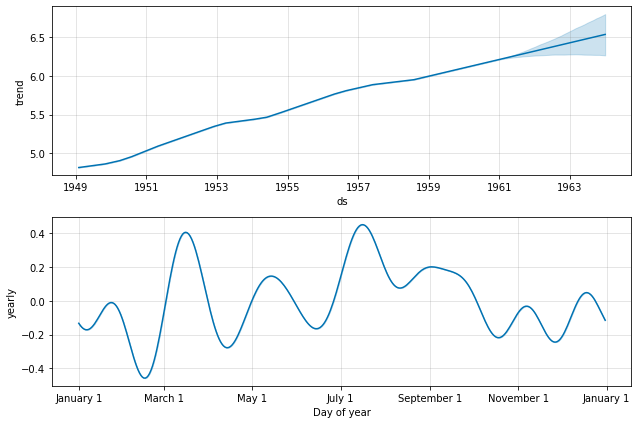

In [94]:
my_forecast.plot_components(forecast)

In [99]:
!jupyter nbconvert MODULE5_DAY2_FBPROPHET.ipynb

[NbConvertApp] Converting notebook MODULE5_DAY2_FBPROPHET.ipynb to html
[NbConvertApp] Writing 1074404 bytes to MODULE5_DAY2_FBPROPHET.html
